In [7]:
cd planeteScripts/

/home/schlecker/repos/planeteScripts


In [8]:
from planeteOutput import *
from planetePlots import *
import scipy.ndimage as nd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
%load_ext autoreload
%autoreload 2

In [12]:
file = 'zubehoer/ref_red5e9.dat_J31_11220'
rr = read_ref_red(file)

## A test for get_orbitalPeriod

In [ ]:
import pandas as pd

MstarRel=1.0
a_Earth = 1.
a_Mars = 1.523662
test = pd.DataFrame({'a' : [a_Earth, a_Mars]})
get_orbitalPeriod(test, MstarRel)

## Test compute_logbins(binWidth, Range)

In [ ]:
binWidth_dex = 1.0
Range = (10., 1000.)
compute_logbins(binWidth_dex, Range)

## Produce occurrence map for J31 (Mstar = Msol)

In [13]:
rr = get_orbitalPeriod(rr, MstarRel=1.0)

In [ ]:
%pylab

In [15]:
j31Heavy = rr[rr['m'] > 1e0]
j31Heavy.r.describe()

count    4052.000000
mean        2.844088
std        31.574655
min         0.065410
25%         0.159622
50%         0.309418
75%         1.058463
max      1322.580000
Name: r, dtype: float64

In [176]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [188]:
h, xedges, yedges, ax = plot_occurrence(rr, style='annotated', logColormap=False, yAxis='r', xRange=(1.,300), yRange=(0.5,32.))
plt.title('J31 at $5\cdot10^9 \, \mathrm{yr}$')

using only planets with status "0"
Number of Systems: 559


Text(0.5,1,'J31 at $5\\cdot10^9 \\, \\mathrm{yr}$')

/home/schlecker/bin/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1016: UserWarning: Warning: converting a masked element to nan.
  return '%-12g' % value


In [131]:
ticklabels = [None, None]
xedges = [1.,2.,3.,4.,5.]
for dim, edges in enumerate([xedges]):
    ticks = [" " for i in range(len(edges))]
    print(ticks)
    print(edges)
    print(int(len(edges)/2))
    keptTicks = edges[::int(len(edges)/2)]
    ticks[::int(len(edges)/2)] = keptTicks
    ticklabels[dim] = ticks
print(ticklabels[0])

[' ', ' ', ' ', ' ', ' ']
[1.0, 2.0, 3.0, 4.0, 5.0]
2
[1.0, ' ', 3.0, ' ', 5.0]


### produce 2D histogram with annotations

[[<matplotlib.axis.XTick at 0x7f40514e0748>,
 [Text(0.5,0,'1.0'),
  Text(1.5,0,'1.77827941004'),
  Text(2.5,0,'3.16227766017'),
  Text(3.5,0,'5.6234132519'),
  Text(4.5,0,'10.0'),
  Text(5.5,0,'17.7827941004'),
  Text(6.5,0,'31.6227766017'),
  Text(7.5,0,'56.234132519'),
  Text(8.5,0,'100.0'),
  Text(9.5,0,'177.827941004'),
  Text(0,0,'316.227766017')]]

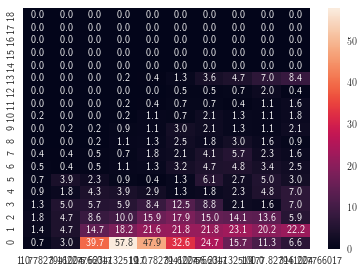

In [72]:
import seaborn as sns
ax = sns.heatmap(h, annot=True, fmt=".1f")
ax.invert_yaxis()

#get ticks right
ax.set(xticks=range(len(xedges)), xticklabels=xedges)



## occurrence maps for J35 (Mstar = 0.1 Msol)

In [577]:
rr9e9 = read_ref_red('/home/schlecker/phd/planete/outputs/J35/ref_red9e9.dat')
rr9e9 = get_orbitalPeriod(rr9e9, MstarRel=0.1)
rr9e9.r.describe()

count    25800.000000
mean         0.196506
std          0.760679
min          0.000000
25%          0.031644
50%          0.055017
75%          0.113029
max         67.959500
Name: r, dtype: float64

In [588]:
rr9e9_sample = rr9e9.sample(600)
rr9e9_sample.r.describe()

count    600.000000
mean       0.196424
std        0.490979
min        0.020519
25%        0.029786
50%        0.051640
75%        0.112112
max        4.394430
Name: r, dtype: float64

In [590]:
h, xedges, yedges, ax = plot_occurrence(rr9e9_sample, logColormap=False, yAxis='r', discreteColors=False, xRange=(1.,300), yRange=(0.5,32.), smooth=False)
plt.title('J35 at $9\cdot10^9 \, \mathrm{yr}$')

using only planets with status "0"
Number of Systems: 235


Text(0.5,1,'J35 at $9\\cdot10^9 \\, \\mathrm{yr}$')